In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import laspy
import os
import math
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize, ListedColormap, BoundaryNorm
import matplotlib.colors as mcolors
mm = 1/25.4

# Sample building

In [1]:
basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"
neighborhood = "Test_70_el Besòs i el Maresme"
parcelsFolder = basePath + "/Results/" + neighborhood + "/Parcels/"
parcel = "4157903DF3845E"#"4054901DF3845C"#
construction = "86"#"408"#

parcel = "4054901DF3845C"#"4157903DF3845E"#
construction = "408"#"86"#

## Plot LiDAR data

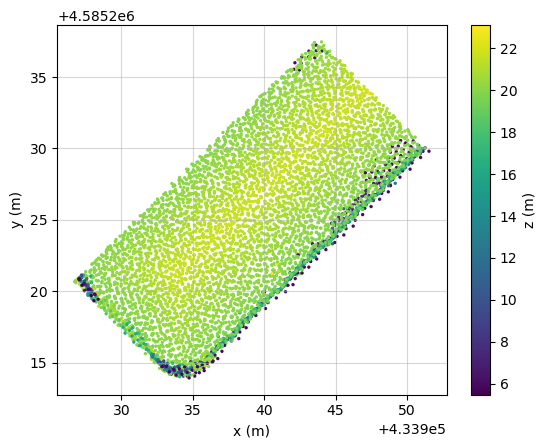

In [4]:
constructionFolder = parcelsFolder + parcel + "/" + construction
# constructionFolder2 = parcelsFolder + parcel2 + "/" + construction2
laz_file = constructionFolder + "/Map files/" + construction + ".laz"
lasDF = laspy.read(laz_file)
x = lasDF.x
y = lasDF.y
z = lasDF.z

fig, ax = plt.subplots()
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

scatter = ax.scatter(x, y, c=z, cmap='viridis', s=2)
cb = plt.colorbar(scatter)
cb.set_label('z (m)')

ax.set_aspect("equal", adjustable='box')
plt.grid(alpha=0.5)
# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/LiDAR_Sample.png",bbox_inches='tight', dpi=300)
# plt.savefig("/home/jaumeasensio/Documents/TFM/Report_Sample/4054901DF3845C_408_LiDAR.png",bbox_inches='tight', dpi=300)

## Get histogram

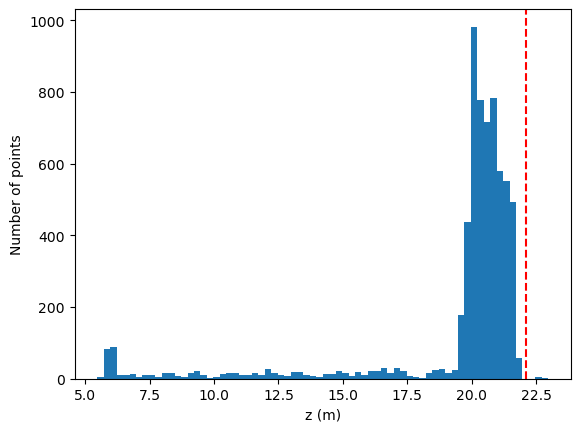

In [5]:
constructionFolder = parcelsFolder + parcel + "/" + construction
laz_file = constructionFolder + "/Map files/" + construction + ".laz"
lasDF = laspy.read(laz_file)
x = lasDF.x
y = lasDF.y
z = lasDF.z

distance_threshold = 0.5
fig, ax = plt.subplots()
Z = np.array(lasDF.z)
Z = Z[Z.argsort()]         
deltaZ = np.diff(Z, prepend=0)

heightSplits = []
for i in range(1, len(deltaZ)):
    if deltaZ[i] > distance_threshold:
        heightSplits.append(Z[i-1])

bins = np.arange(np.min(Z), np.max(Z), 0.5*distance_threshold)
ax.hist(Z, bins)
ax.set_xlabel("z (m)")
ax.set_ylabel("Number of points")

for split in heightSplits:
    ax.axvline(x=split+0.5*distance_threshold, color='red', linestyle='--', linewidth=1.5)

# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/Histogram.png",bbox_inches='tight')
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/Height_Split/Histogram_408.pdf",bbox_inches='tight')

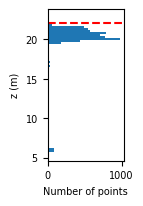

In [6]:
plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7
})

constructionFolder = parcelsFolder + parcel + "/" + construction
laz_file = constructionFolder + "/Map files/" + construction + ".laz"
lasDF = laspy.read(laz_file)
x = lasDF.x
y = lasDF.y
z = lasDF.z

distance_threshold = 0.5
fig, ax = plt.subplots(figsize=(25*mm,50*mm))
Z = np.array(lasDF.z)
Z = Z[Z.argsort()]         
deltaZ = np.diff(Z, prepend=0)

heightSplits = []
for i in range(1, len(deltaZ)):
    if deltaZ[i] > distance_threshold:
        heightSplits.append(Z[i-1])

bins = np.arange(np.min(Z), np.max(Z), 0.5 * distance_threshold)
ax.hist(Z, bins, orientation='horizontal')
ax.set_ylabel("z (m)")
ax.set_xlabel("Number of points")

for split in heightSplits:
    ax.axhline(y=split + 0.5 * distance_threshold, color='red', linestyle='--', linewidth=1.5)

# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/Histogram.png",bbox_inches='tight')
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/Height_Split/Histogram_86.pdf")


/tmp/ipykernel_65341/4219260242.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_clusters))  # or another colormap


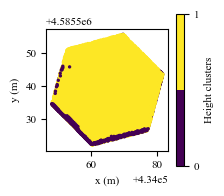

In [16]:
from planeIdentification import *
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize, ListedColormap, BoundaryNorm
import matplotlib.colors as mcolors

pipeline = ClusterPipeline([
                    HeightSplit(distance_threshold = 0.5),  # First clustering stage
                    # PlaneExtraction(inlierThreshold=0.3, num_iterations=50),
                ])
pipeline.fit(lasDF.xyz)

lasDF.classification  = pipeline.final_labels

fig, ax = plt.subplots(figsize=(50*mm, 50*mm))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

unique_clusters = np.unique(lasDF.classification)
cmap = cm.get_cmap('viridis', len(unique_clusters))  # or another colormap
scatter = ax.scatter(x, y, c=lasDF.classification, s=2, cmap=cmap)
scatter.set_rasterized(True)


# Create colorbar with discrete ticks
cb = plt.colorbar(scatter)
cb.set_label('Height clusters')
cb.set_ticks(np.arange(len(unique_clusters)))  # Set ticks to the number of unique clusters
cb.set_ticks(unique_clusters)  # Ensure the ticks match the clusters


ax.set_aspect("equal", adjustable='box')
# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/LiDAR_HeightSplit.png",bbox_inches='tight')
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/Height_Split/LiDAR_HeightSplit_408.pdf")

/tmp/ipykernel_201847/2311516176.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_clusters))
/tmp/ipykernel_201847/2311516176.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


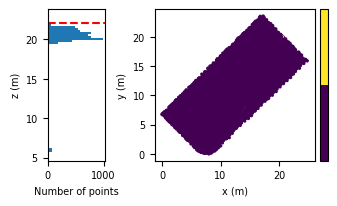

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import laspy
from mpl_toolkits.axes_grid1 import make_axes_locatable


plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7
})

# Conversion factor
mm = 1 / 25.4

# Define dimensions
width_hist = 15 * mm
width_scatter = 50 * mm
breather = 30 * mm
height = 50 * mm
total_width = width_hist + breather + width_scatter

# Load LiDAR data
constructionFolder = parcelsFolder + parcel + "/" + construction
laz_file = constructionFolder + "/Map files/" + construction + ".laz"
lasDF = laspy.read(laz_file)
x = lasDF.x
y = lasDF.y
z = lasDF.z

# Prepare histogram data
distance_threshold = 0.5
Z = np.array(z)
Z = Z[Z.argsort()]
deltaZ = np.diff(Z, prepend=0)

heightSplits = []
for i in range(1, len(deltaZ)):
    if deltaZ[i] > distance_threshold:
        heightSplits.append(Z[i-1])

bins = np.arange(np.min(Z), np.max(Z), 0.5 * distance_threshold)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2,
    figsize=(total_width, height),
    gridspec_kw={'width_ratios': [width_hist, width_scatter], 'wspace': breather / total_width}
)

# Left: Histogram
ax1.hist(Z, bins, orientation='horizontal', log=False)
ax1.set_ylabel("z (m)") #, loc="top", rotation="horizontal"
# ax1.yaxis.set_label_coords(-0.05,1.0)
ax1.set_xlabel("Number of points")
for split in heightSplits:
    ax1.axhline(y=split + 0.5 * distance_threshold, color='red', linestyle='--', linewidth=1.5)

# Right: Height clustering
from planeIdentification import ClusterPipeline, HeightSplit

pipeline = ClusterPipeline([
    HeightSplit(distance_threshold=0.5),
])
pipeline.fit(lasDF.xyz)
lasDF.classification = pipeline.final_labels

unique_clusters = np.unique(lasDF.classification)
cmap = cm.get_cmap('viridis', len(unique_clusters))

scatter = ax2.scatter(x-x.min(), y-y.min(), c=lasDF.classification, s=2, cmap=cmap,  rasterized=True)


divider = make_axes_locatable(ax2)
cb_ax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(scatter, cax=cb_ax)
cb.set_ticks([])
cb_ax.tick_params(left=False, labelleft=False)

ax2.set_xlabel("x (m)")
ax2.set_ylabel("y (m)")
# ax2.yaxis.set_label_coords(-0.05,1.0)
ax2.set_aspect("equal", adjustable='box')
# scatter.set_rasterized(True)

# Save the figure
plt.tight_layout()
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/Height_Split/Combined_Histogram_Scatter_408_vRAW.pdf", bbox_inches='tight', dpi=600)
plt.show()

## Plane Gradient

In [157]:
def computeGradients(X, squareSize = 2, polar = True):
    gradients = np.zeros((X.shape[0], 2))
    for i, (x, y, z) in enumerate(X):
        neighbors = X[(np.abs(X[:, 0] - x) <= squareSize/2) & (np.abs(X[:, 1] - y) <= squareSize/2)]
        
        delta_x = neighbors[:, 0] - x
        delta_y = neighbors[:, 1] - y
        delta_z = neighbors[:, 2] - z
        
        valid_dx = delta_x != 0
        valid_dy = delta_y != 0
        
        # Compute sum(deltaZ / deltaX) and sum(deltaZ / deltaY)
        sum_dz_dx = np.sum(delta_z[valid_dx] / delta_x[valid_dx])
        sum_dz_dy = np.sum(delta_z[valid_dy] / delta_y[valid_dy])
        
        # Store the gradient
        gradients[i] = [sum_dz_dx/len(valid_dx), sum_dz_dy/len(valid_dx)]

    if(polar):
        polar_gradients = np.zeros(gradients.shape)
        polar_gradients[:, 0] = np.sqrt(gradients[:, 0]**2 + gradients[:, 1]**2)
        polar_gradients[:constructionFolder

array([[5.05354632e-01, 3.53255213e+02],
       [4.89176815e-01, 2.39207198e+02],
       [1.17601889e-01, 2.96169591e+02],
       ...,
       [2.56361540e+00, 1.00310061e+02],
       [5.62457304e-01, 1.87770347e+02],
       [5.91201646e-01, 2.26882536e+02]])

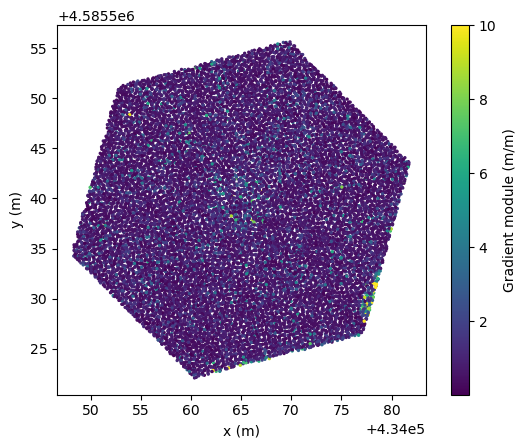

/tmp/ipykernel_256883/2704478356.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick


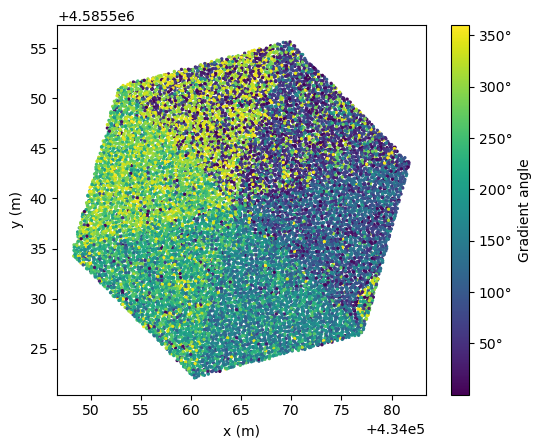

In [164]:

x = lasDF.x[np.where(lasDF.classification == 1)]
y = lasDF.y[np.where(lasDF.classification == 1)]

fig, ax = plt.subplots()
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')


scatter = ax.scatter(x, y, c=np.minimum(gradients[:, 0], 10), cmap='viridis', s=2)
cb = plt.colorbar(scatter)laz_file = constructionFolder + "/Map files/" + construction + ".laz"
ax.set_ylabel('y (m)')

scatter = ax.scatter(x, y, c=gradients[:,1], cmap='viridis', s=2)
cb = plt.colorbar(scatter)
cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks
cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick
cb.set_label('Gradient angle')

ax.set_aspect("equal", adjustable='box')
# plt.title("Gradient angle")
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/Gradient_Angle.png",bbox_inches='tight')
plt.show()

In [156]:
lasDF.classification

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

## Voronoi Diagram

In [46]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Polygon, MultiPoint, MultiPolygon, GeometryCollection, Point
from shapely import make_valid, intersection
from shapely.ops import unary_union
from scipy.spatial import Voronoi

def get_boundary(bound, offset = 100, steps=10):
    x_bottom_top = np.linspace(bound[0] - offset, bound[2] + offset, steps)
    y_left_right = np.linspace(bound[1] - offset, bound[3] + offset, steps)

    bottom_points = np.column_stack([x_bottom_top, np.repeat(bound[1] - offset, steps)])
    top_points = np.column_stack([x_bottom_top, np.repeat(bound[3] + offset, steps)])
    left_points = np.column_stack([np.repeat(bound[0] - offset, steps), y_left_right])
    right_points = np.column_stack([np.repeat(bound[2] + offset, steps), y_left_right])
    boundarycoords = np.vstack([bottom_points, top_points, left_points, right_points])
    boundarycoords = np.unique(boundarycoords, axis=0)
    return boundarycoords

def obtainLabelsPolygons(vorAll, labels):
    voronoi_polygons_list = []
    clustersPolygons = []

    for idx_region, region in enumerate(vorAll.regions):
        if(region):
            indices = np.where(vorAll.point_region[0:len(labels)] == idx_region)
            selectedLabels = labels[indices]
            if -1 not in region:
                if(np.all(selectedLabels == selectedLabels[0])):
                    polygon = Polygon(vorAll.vertices[region])
                    clustersPolygons.append(selectedLabels[0])
                    voronoi_polygons_list.append(polygon)
                else:   
                    try:
                        outline = Polygon(vorAll.vertices[region])
                        points = vorAll.points[indices]
                        if(not np.all((points == points[0]).all())):
                            boundarycoords = get_boundary(outline.bounds)
                            allPoints = np.concatenate((points[:,0:2], boundarycoords))
                            miniVor = Voronoi(allPoints)
                            subVorList, subClusterList = obtainLabelsPolygons(miniVor, selectedLabels)
                            subVorList = [intersection(x.buffer(0), outline.buffer(0)) for x in subVorList]
                            voronoi_polygons_list += subVorList
                            clustersPolygons += subClusterList
                        else:
                            clustersPolygons.append(selectedLabels[0])
                            voronoi_polygons_list.append(outline)
                    except RecursionError:
                        # print("There was an Infinite Recursion Error!")
                        clustersPolygons.append(selectedLabels[0])
                        outline = Polygon(vorAll.vertices[region])
                        voronoi_polygons_list.append(outline)

    return voronoi_polygons_list, clustersPolygons

def getVoronoiClipped(points, labels, cadasterGDF):

    boundarycoords = get_boundary(cadasterGDF.geometry.total_bounds)
    allPoints = np.concatenate((points[:,0:2], boundarycoords))
    vorAll = Voronoi(allPoints)


    # extract valid polygons
    voronoi_polygons_list = []
    clustersPolygons = []

    # for i in range(len(points)):
    #     idx_region = vorAll.point_region[i]
    #     if -1 not in vorAll.regions[idx_region]:
    #         polygon = Polygon(vorAll.vertices[vorAll.regions[idx_region]])
    #         clustersPolygons.append(labels[i])
    #         voronoi_polygons_list.append(polygon)

    voronoi_polygons_list, clustersPolygons = obtainLabelsPolygons(vorAll, labels)

    vorGDF = gpd.GeoDataFrame({"geometry":voronoi_polygons_list, "cluster":clustersPolygons}, crs=cadasterGDF.crs)
    
    vorGDF["geometry"] = vorGDF.geometry.apply(make_valid)
    vorGDF["geometry"] = vorGDF["geometry"].buffer(0.01)
    vorGDF["geometry"] = vorGDF["geometry"].buffer(-0.01)
    merged_gdf = vorGDF    
    merged_gdf["geometry"] = merged_gdf["geometry"].apply(unary_union)
    clippedGDF = gpd.clip(merged_gdf, cadasterGDF, sort=True)

    return clippedGDF

In [47]:
cadasterPath = constructionFolder + "/Map files/" + construction + ".gpkg"
cadasterGDF = gpd.read_file(cadasterPath)

newLasFile = constructionFolder + "/Plane Identification/" + construction + ".laz"
newLasDF = laspy.read(newLasFile)

clippedGDF = getVoronoiClipped(newLasDF.xyz, newLasDF.classification, cadasterGDF)

cadasterPath2 = constructionFolder2 + "/Map files/" + construction2 + ".gpkg"
cadasterGDF2 = gpd.read_file(cadasterPath2)

newLasFile2 = constructionFolder2 + "/Plane Identification/" + construction2 + ".laz"
newLasDF2 = laspy.read(newLasFile2)

clippedGDF2 = getVoronoiClipped(newLasDF2.xyz, newLasDF2.classification, cadasterGDF2)

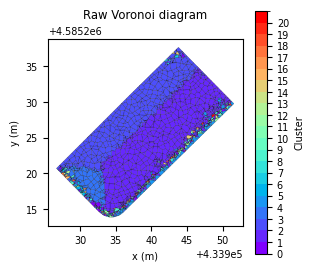

In [42]:
plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7
})

fig, ax = plt.subplots(figsize=(80*mm,80*mm))  # Adjust figure size if needed figsize=(10, 8)


# Define the number of discrete bins
clusters = sorted(clippedGDF["cluster"].unique())  # Get unique cluster values
num_clusters = len(clusters)

# Set up the colormap and boundaries
cmap = plt.get_cmap("rainbow", num_clusters)  # Discrete version of the colormap
boundaries = np.arange(min(clusters), max(clusters) + 2)  # Create boundaries for the clusters
norm = BoundaryNorm(boundaries, cmap.N, extend="neither")

clippedGDF.plot(
    column="cluster",
    edgecolor="black",
    linewidth=0.125,
    cmap=cmap,
    norm=norm,
    ax=ax
)

# Add the discrete colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for ScalarMappable
cbar = fig.colorbar(sm, ax=ax, boundaries=boundaries, ticks=clusters)
cbar.set_label("Cluster")  # Label for the colorbar

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

plt.title("Raw Voronoi diagram")

# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/Voronoi_Building.png", dpi=300, bbox_inches="tight")  # Use bbox_inches to prevent clipping

# plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/Clustering/Clustering_86.pdf")
plt.show()

# Define the number of discrete bins
clusters2 = sorted(clippedGDF2["cluster"].unique())  # Get unique cluster values
num_clusters2 = len(clusters2)

# Set up the colormap and boundaries
cmap = plt.get_cmap("rainbow", num_clusters2)  # Discrete version of the colormap
boundaries = np.arange(min(clusters2), max(clusters2) + 2)  # Create boundaries for the clusters
norm = BoundaryNorm(boundaries, cmap.N, extend="neither")

clippedGDF.plot(
    column="cluster",
    edgecolor="black",
    linewidth=0.125,
    cmap=cmap,
    norm=norm,
    ax=ax
)

# Add the discrete colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for ScalarMappable
cbar = fig.colorbar(sm, ax=ax, boundaries=boundaries, ticks=clusters)
cbar.set_label("Cluster")  # Label for the colorbar

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

plt.title("Raw Voronoi diagram")

# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/Voronoi_Building.png", dpi=300, bbox_inches="tight")  # Use bbox_inches to prevent clipping

# plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/Clustering/Clustering_86.pdf")
plt.show()

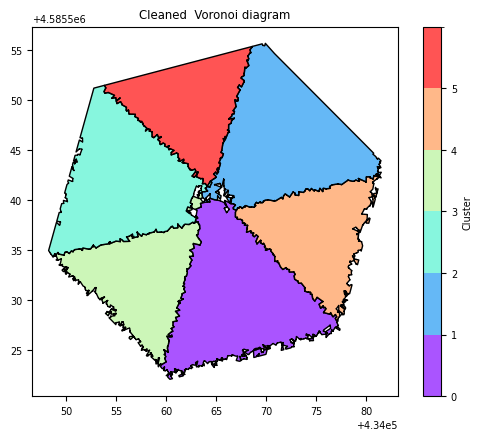

In [49]:
cleanCadasterPath = constructionFolder + "/Plane Identification/" + construction + ".gpkg"
cleanGDF = gpd.read_file(cleanCadasterPath)
cleanGDF["cluster"] = cleanGDF["cluster"] - cleanGDF["cluster"].min()

cleanCadasterPath2 = constructionFolder2 + "/Plane Identification/" + construction2 + ".gpkg"
cleanGDF2 = gpd.read_file(cleanCadasterPath2)
cleanGDF2["cluster"] = cleanGDF2["cluster"] - cleanGDF2["cluster"].min()

fig, ax = plt.subplots()  # Adjust figure size if needed figsize=(10, 8)

# Define the number of discrete bins
clusters = sorted(cleanGDF["cluster"].unique())  # Get unique cluster values
num_clusters = len(clusters)

# Set up the colormap and boundaries
cmap = plt.get_cmap("rainbow", num_clusters)  # Discrete version of the colormap
cmap = mcolors.ListedColormap(cmap(np.arange(num_clusters)), name='Pastel1_with_alpha')
cmap.colors[:, -1] = 0.67
boundaries = np.arange(min(clusters), max(clusters) + 2)  # Create boundaries for the clusters
norm = BoundaryNorm(boundaries, cmap.N, extend="neither")

cleanGDF.plot(
    column="cluster",
    edgecolor="black",
    linewidth=1,
    cmap=cmap,
    norm=norm,
    ax=ax
)

# Add the discrete colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for ScalarMappable
cbar = fig.colorbar(sm, ax=ax, boundaries=boundaries, ticks=clusters)
cbar.set_label("Cluster")  # Label for the colorbar

plt.title("Cleaned  Voronoi diagram")

# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/Voronoi_Cleaned.png", dpi=300, bbox_inches="tight")  # Use bbox_inches to prevent clipping
# plt.grid(alpha=0.5)
# plt.savefig("/home/jaumeasensio/Documents/TFM/Report_Sample/4054901DF3845C_408_PlaneID.png",bbox_inches='tight', dpi=300)
plt.show()

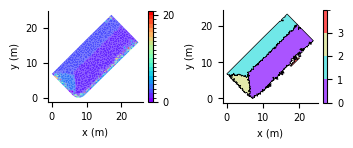

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

augment = 1

plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7*augment
})

# Shift clippedGDF so that min x and y are 0
minx1, miny1, _, _ = clippedGDF.total_bounds
clippedGDF["geometry"] = clippedGDF.translate(xoff=-minx1, yoff=-miny1)

# Shift cleanGDF so that min x and y are 0
minx2, miny2, _, _ = cleanGDF.total_bounds
cleanGDF["geometry"] = cleanGDF.translate(xoff=-minx2, yoff=-miny2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(90*mm, 60*mm))  # 160mm x 80mm in inches

# --- First subplot: Raw Voronoi Diagram ---
clusters1 = sorted(clippedGDF["cluster"].unique())
num_clusters1 = len(clusters1)
cmap1 = plt.get_cmap("rainbow", num_clusters1)
boundaries1 = np.arange(min(clusters1), max(clusters1) + 2)
norm1 = BoundaryNorm(boundaries1, cmap1.N, extend="neither")

collection = clippedGDF.plot(
    column="cluster",
    edgecolor="none",
    linewidth=0.05,
    cmap=cmap1,
    norm=norm1,
    ax=ax1
)
collection.get_children()[0].set_rasterized(True)


divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm1)
sm1.set_array([])
tick_values = [clusters1[0], clusters1[-1]]
cbar1 = fig.colorbar(sm1, cax=cax1, boundaries=boundaries1, ticks=tick_values)
# cbar1.set_label("Cluster")

# ax1.set_title("Raw clustering", pad=12)
tickDist = 10
xlim = ax1.get_xlim()
ax1.set_xticks(np.arange(np.ceil(xlim[0]/tickDist)*tickDist, np.ceil(xlim[1]/tickDist)*tickDist, tickDist))
ylim = ax1.get_ylim()
ax1.set_yticks(np.arange(np.ceil(ylim[0]/tickDist)*tickDist, np.ceil(ylim[1]/tickDist)*tickDist, tickDist))

ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)") #, loc="top", rotation="horizontal"

# --- Second subplot: Cleaned Voronoi Diagram ---
cleanGDF["cluster"] = cleanGDF["cluster"] - cleanGDF["cluster"].min()
clusters2 = sorted(cleanGDF["cluster"].unique())
num_clusters2 = len(clusters2)
cmap2_base = plt.get_cmap("rainbow", num_clusters2)
cmap2 = mcolors.ListedColormap(cmap2_base(np.arange(num_clusters2)), name='ModifiedRainbow')
cmap2.colors[:, -1] = 0.67  # Set alpha

boundaries2 = np.arange(min(clusters2), max(clusters2) + 2)
norm2 = BoundaryNorm(boundaries2, cmap2.N, extend="neither")

cleanGDF.plot(
    column="cluster",
    edgecolor="black",
    linewidth=0.5,
    cmap=cmap2,
    norm=norm2,
    ax=ax2
)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
sm2.set_array([])
cbar2 = fig.colorbar(sm2, cax=cax2, boundaries=boundaries2, ticks=clusters2)
# cbar2.set_label("Cluster")

# ax2.set_title("Cleaned/filtered clusters", pad=12)
xlim = ax2.get_xlim()
ax2.set_xticks(np.arange(np.ceil(xlim[0]/tickDist)*tickDist, np.ceil(xlim[1]/tickDist)*tickDist, tickDist))
ylim = ax2.get_ylim()
ax2.set_yticks(np.arange(np.ceil(ylim[0]/tickDist)*tickDist, np.ceil(ylim[1]/tickDist)*tickDist, tickDist))

ax2.set_xlabel("x (m)")
ax2.set_ylabel("y (m)") #, loc="top", rotation="horizontal"

# ax1.axis("off")
# ax2.axis("off")

for ax in [ax1, ax2]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)

# --- Save or Show ---
plt.tight_layout()
# ax1.xaxis.set_label_coords(1, -0.05)
# ax1.yaxis.set_label_coords(-0.05, 0.5)

# ax2.xaxis.set_label_coords(1, -0.05)
# ax2.yaxis.set_label_coords(-0.05, 0.5)
# plt.savefig("combined_voronoi_diagrams.pdf", dpi=300, bbox_inches="tight")
# ax1.set_rasterized(True)
# ax2.set_rasterized(True)
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/Clustering/Clustering_408.pdf", bbox_inches="tight", dpi=900)
plt.show()


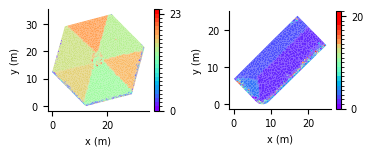

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig1, (ax1a, ax1b) = plt.subplots(1, 2, figsize=(95 * mm, 60 * mm))

# --- Prepare first clippedGDF
minx1, miny1, _, _ = clippedGDF.total_bounds
clippedGDF["geometry"] = clippedGDF.translate(xoff=-minx1, yoff=-miny1)

clusters1 = sorted(clippedGDF["cluster"].unique())
cmap1 = plt.get_cmap("rainbow", len(clusters1))
boundaries1 = np.arange(min(clusters1), max(clusters1) + 2)
norm1 = BoundaryNorm(boundaries1, cmap1.N, extend="neither")

clippedGDF.plot(
    column="cluster",
    edgecolor="none",
    linewidth=0.05,
    cmap=cmap1,
    norm=norm1,
    ax=ax1a
)
ax1a.set_xlabel("x (m)")
ax1a.set_ylabel("y (m)")

divider1 = make_axes_locatable(ax1a)
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm1)
sm1.set_array([])
tick_values = [clusters1[0], clusters1[-1]]
cbar1 = fig.colorbar(sm1, cax=cax1, boundaries=boundaries1, ticks=tick_values)

# --- Prepare second clippedGDF2
minx1b, miny1b, _, _ = clippedGDF2.total_bounds
clippedGDF2["geometry"] = clippedGDF2.translate(xoff=-minx1b, yoff=-miny1b)

clusters1b = sorted(clippedGDF2["cluster"].unique())
cmap1b = plt.get_cmap("rainbow", len(clusters1b))
boundaries1b = np.arange(min(clusters1b), max(clusters1b) + 2)
norm1b = BoundaryNorm(boundaries1b, cmap1.N, extend="neither")

clippedGDF2.plot(
    column="cluster",
    edgecolor="none",
    linewidth=0.05,
    cmap=cmap1b,
    norm=norm1b,
    ax=ax1b
)

divider1b = make_axes_locatable(ax1b)
cax1b = divider1b.append_axes("right", size="5%", pad=0.05)
sm1b = plt.cm.ScalarMappable(cmap=cmap1b, norm=norm1b)
sm1b.set_array([])
tick_values = [clusters1b[0], clusters1b[-1]]
cbar1b = fig.colorbar(sm1b, cax=cax1b, boundaries=boundaries1b, ticks=tick_values)


ax1b.set_xlabel("x (m)")
ax1b.set_ylabel("y (m)")

for ax in [ax1a, ax1b]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/Clustering/RawClusters.pdf", bbox_inches="tight", dpi=900)
plt.show()


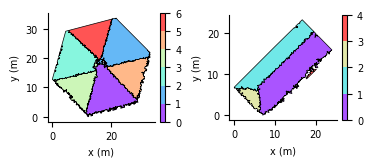

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig1, (ax1a, ax1b) = plt.subplots(1, 2, figsize=(95 * mm, 60 * mm))

# --- Prepare first clippedGDF
minx1, miny1, _, _ = cleanGDF.total_bounds
cleanGDF["geometry"] = cleanGDF.translate(xoff=-minx1, yoff=-miny1)

cleanGDF["cluster"] = cleanGDF["cluster"] - cleanGDF["cluster"].min()
clusters2 = sorted(cleanGDF["cluster"].unique())
num_clusters2 = len(clusters2)
cmap2_base = plt.get_cmap("rainbow", num_clusters2)
cmap2 = mcolors.ListedColormap(cmap2_base(np.arange(num_clusters2)), name='ModifiedRainbow')
cmap2.colors[:, -1] = 0.67  # Set alpha

boundaries2 = np.arange(min(clusters2), max(clusters2) + 2)
norm2 = BoundaryNorm(boundaries2, cmap2.N, extend="neither")

cleanGDF.plot(
    column="cluster",
    edgecolor="black",
    linewidth=0.5,
    cmap=cmap2,
    norm=norm2,
    ax=ax1a
)


ax1a.set_xlabel("x (m)")
ax1a.set_ylabel("y (m)")

divider1 = make_axes_locatable(ax1a)
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
sm1 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
sm1.set_array([])
cbar1 = fig.colorbar(sm1, cax=cax1, boundaries=boundaries2)

# --- Prepare second clippedGDF2
minx1b, miny1b, _, _ = cleanGDF2.total_bounds
cleanGDF2["geometry"] = cleanGDF2.translate(xoff=-minx1b, yoff=-miny1b)
cleanGDF2["cluster"] = cleanGDF2["cluster"] - cleanGDF2["cluster"].min()
clusters2b = sorted(cleanGDF2["cluster"].unique())
num_clusters2b = len(clusters2b)
cmap2b_base = plt.get_cmap("rainbow", num_clusters2b)
cmap2b = mcolors.ListedColormap(cmap2b_base(np.arange(num_clusters2b)), name='ModifiedRainbow')
cmap2b.colors[:, -1] = 0.67  # Set alpha

boundaries2b = np.arange(min(clusters2b), max(clusters2b) + 2)
norm2b = BoundaryNorm(boundaries2b, cmap2b.N, extend="neither")

cleanGDF2.plot(
    column="cluster",
    edgecolor="black",
    linewidth=0.5,
    cmap=cmap2b,
    norm=norm2b,
    ax=ax1b
)

divider1b = make_axes_locatable(ax1b)
cax1b = divider1b.append_axes("right", size="5%", pad=0.05)
sm1b = plt.cm.ScalarMappable(cmap=cmap2b, norm=norm2b)
sm1b.set_array([])
cbar1b = fig.colorbar(sm1b, cax=cax1b, boundaries=boundaries2b)


ax1b.set_xlabel("x (m)")
ax1b.set_ylabel("y (m)")

for ax in [ax1a, ax1b]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/Clustering/CleanClusters.pdf", bbox_inches="tight", dpi=900)
plt.show()

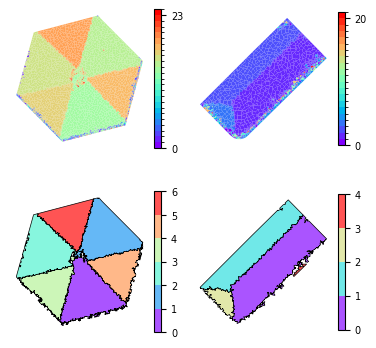

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7
})

fig, axes = plt.subplots(2, 2, figsize=(96* mm, 96 * mm))  # 2x2 grid
(ax1, ax2), (ax3, ax4) = axes

def plot_clusters(ax, gdf, cmap, norm, edgecolor='none', linewidth=0.05, minMax=False):
    collection = gdf.plot(
        column="cluster",
        edgecolor=edgecolor,
        linewidth=linewidth,
        cmap=cmap,
        norm=norm,
        ax=ax
    )
    # ax.set_xlabel("x (m)")
    # ax.set_ylabel("y (m)")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    if(minMax):
        tick_values = [int(gdf["cluster"].min()), int(gdf["cluster"].max())]
        fig.colorbar(sm, cax=cax, boundaries=norm.boundaries, ticks=tick_values)
        collection.get_children()[0].set_rasterized(True)
    else:
        fig.colorbar(sm, cax=cax, boundaries=norm.boundaries)

# --- Plot 1: Raw clippedGDF
minx, miny, _, _ = clippedGDF.total_bounds
clippedGDF["geometry"] = clippedGDF.translate(xoff=-minx, yoff=-miny)
clusters = sorted(clippedGDF["cluster"].unique())
cmap = plt.get_cmap("rainbow", len(clusters))
boundaries = np.arange(min(clusters), max(clusters) + 2)
norm = BoundaryNorm(boundaries, cmap.N)
plot_clusters(ax1, clippedGDF, cmap, norm, minMax=True)

# --- Plot 2: Raw clippedGDF2
minx, miny, _, _ = clippedGDF2.total_bounds
clippedGDF2["geometry"] = clippedGDF2.translate(xoff=-minx, yoff=-miny)
clusters = sorted(clippedGDF2["cluster"].unique())
cmap = plt.get_cmap("rainbow", len(clusters))
boundaries = np.arange(min(clusters), max(clusters) + 2)
norm = BoundaryNorm(boundaries, cmap.N)
plot_clusters(ax2, clippedGDF2, cmap, norm, minMax=True)

# --- Plot 3: Clean cleanGDF
minx, miny, _, _ = cleanGDF.total_bounds
cleanGDF["geometry"] = cleanGDF.translate(xoff=-minx, yoff=-miny)
cleanGDF["cluster"] -= cleanGDF["cluster"].min()
clusters = sorted(cleanGDF["cluster"].unique())
cmap_base = plt.get_cmap("rainbow", len(clusters))
cmap = mcolors.ListedColormap(cmap_base(np.arange(len(clusters))), name='ModifiedRainbow')
cmap.colors[:, -1] = 0.67
boundaries = np.arange(min(clusters), max(clusters) + 2)
norm = BoundaryNorm(boundaries, cmap.N)
plot_clusters(ax3, cleanGDF, cmap, norm, edgecolor='black', linewidth=0.5)

# --- Plot 4: Clean cleanGDF2
minx, miny, _, _ = cleanGDF2.total_bounds
cleanGDF2["geometry"] = cleanGDF2.translate(xoff=-minx, yoff=-miny)
cleanGDF2["cluster"] -= cleanGDF2["cluster"].min()
clusters = sorted(cleanGDF2["cluster"].unique())
cmap_base = plt.get_cmap("rainbow", len(clusters))
cmap = mcolors.ListedColormap(cmap_base(np.arange(len(clusters))), name='ModifiedRainbow')
cmap.colors[:, -1] = 0.67
boundaries = np.arange(min(clusters), max(clusters) + 2)
norm = BoundaryNorm(boundaries, cmap.N)
plot_clusters(ax4, cleanGDF2, cmap, norm, edgecolor='black', linewidth=0.5)


# ax1.set_title("Raw")
# ax2.set_title("Raw")
# ax3.set_title("Clean")
# ax4.set_title("Clean")

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")

plt.tight_layout()
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/Clustering/MergedClusters.pdf", bbox_inches="tight", dpi=900)
plt.show()


In [10]:
cleanGDF["area"] = cleanGDF.geometry.area
cleanGDF

cluster         A         B             D    tilt     azimuth  silhouette  \
0        2  0.211501  0.215785 -1.081179e+06  16.812  224.425604    0.718356   
1        3 -0.111438  0.105880 -4.371184e+05   8.739  133.534980    0.785902   
2        0 -0.237036  0.244355 -1.017541e+06  18.800  135.871064    0.850265   
3        1  0.260014 -0.256405  1.062864e+06  20.061  314.599492    0.802963   

                                            geometry        area  
0  POLYGON ((433929.444 4585218.772, 433929.443 4...   16.279293  
1  POLYGON ((433944.706 4585223.466, 433945.102 4...    1.213276  
2  POLYGON ((433933.943 4585214.663, 433933.943 4...  132.852769  
3  POLYGON ((433927.659 4585220.639, 433927.784 4...   90.374246

## Plane extraction algorithm

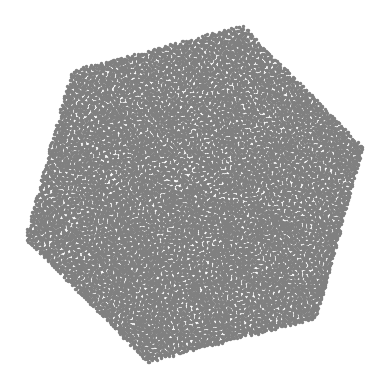

In [330]:
x = newLasDF.x
y = newLasDF.y
z = newLasDF.z
classification = newLasDF.classification

x = x[np.where(classification > 12)]
y = y[np.where(classification > 12)]

This will not be visible for shading, but the information will be obtained in the solar simulation.
# ax.set_ylabel('y (m)')
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# scatter = ax.scatter(x, y, c=z, cmap='viridis', s=2)
scatter = ax.scatter(x, y, c="gray", s=2)
# cb = plt.colorbar(scatter)
# cb.set_label('z (m)')

ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/Steps SubFigures/Unidentified.png",dpi=200, bbox_inches='tight')
plt.show()


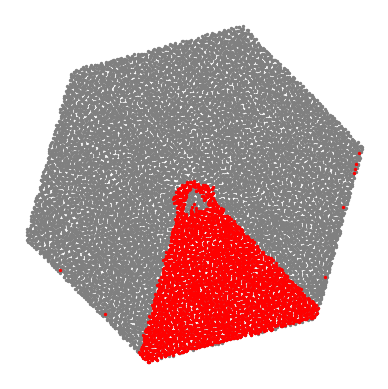

In [331]:
mask = classification == 13

fig, ax = plt.subplots()
# ax.set_xlabel('x (m)')
# ax.set_ylabel('y (m)')
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# scatter = ax.scatter(x, y, c=z, cmap='viridis', s=2)
scatter = ax.scatter(x, y, c="gray", s=2)
# cb = plt.colorbar(scatter)
# cb.set_label('z (m)')
scatter = ax.scatter(x[mask], y[mask], c="red", s=2)

ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/Steps SubFigures/1 Plane.png",dpi=200, bbox_inches='tight')
plt.show()

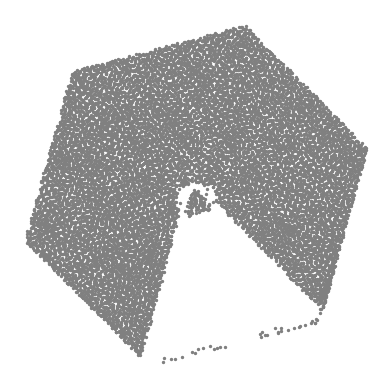

In [332]:
mask = classification == 13

fig, ax = plt.subplots()
# ax.set_xlabel('x (m)')
# ax.set_ylabel('y (m)')
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# scatter = ax.scatter(x[~mask], y[~mask], c=z[~mask], cmap='viridis', s=2)
scatter = ax.scatter(x[~mask], y[~mask], c="gray", s=2)
# cb = plt.colorbar(scatter)
# cb.set_label('z (m)')

ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/Steps SubFigures/Subtracted.png",dpi=200, bbox_inches='tight')
plt.show()

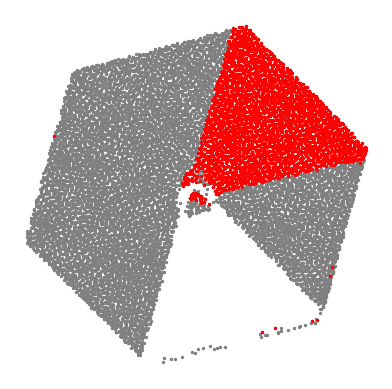

In [333]:
mask = classification == 13

fig, ax = plt.subplots()
# ax.set_xlabel('x (m)')
# ax.set_ylabel('y (m)')
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# scatter = ax.scatter(x[~mask], y[~mask], c=z[~mask], cmap='viridis', s=2)
scatter = ax.scatter(x[~mask], y[~mask], c="gray", s=2)
# cb = plt.colorbar(scatter)
# cb.set_label('z (m)')

mask = classification == 14
scatter = ax.scatter(x[mask], y[mask], c="red", s=2)

ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/Steps SubFigures/2 planes.png",dpi=200, bbox_inches='tight')
plt.show()

## K-planes algorithm

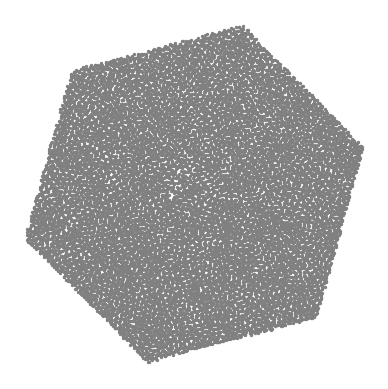

In [336]:
x = newLasDF.x
y = newLasDF.y
z = newLasDF.z
classification = newLasDF.classification

x = x[(classification > 12) & (classification < 19)]
y = y[(classification > 12) & (classification < 19)]
z = z[(classification > 12) & (classification < 19)]
classification = classification[(classification > 12) & (classification < 19)]

fig, ax = plt.subplots()
# ax.set_xlabel('x (m)')
# ax.set_ylabel('y (m)')
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

scatter = ax.scatter(x, y, c="gray", s=2)
# cb = plt.colorbar(scatter)
# cb.set_label('z (m)')

ax.set_aspect("equal", adjustable='box')
# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/LiDAR_Sample.png",bbox_inches='tight')
plt.show()


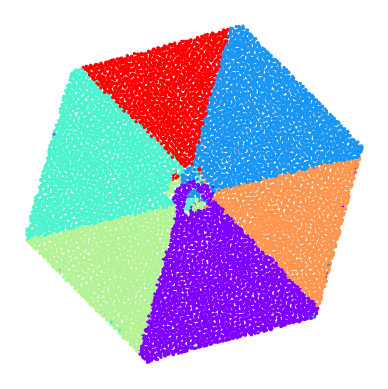

In [337]:
fig, ax = plt.subplots()
# ax.set_xlabel('x (m)')
# ax.set_ylabel('y (m)')
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

classification = classification-np.min(classification)

scatter = ax.scatter(x, y, c=classification, cmap="rainbow", s=2)
# cb = plt.colorbar(scatter)
# cb.set_label('z (m)')

ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/Steps SubFigures/KPlanes.png",dpi=200, bbox_inches='tight')
plt.show()

# Bad silhouette

In [41]:
basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"
neighborhood = "Test_70_el Besòs i el Maresme"
parcelsFolder = basePath + "/Results/" + neighborhood + "/Parcels/"
parcel = "4151302DF3845A"
construction = "139"

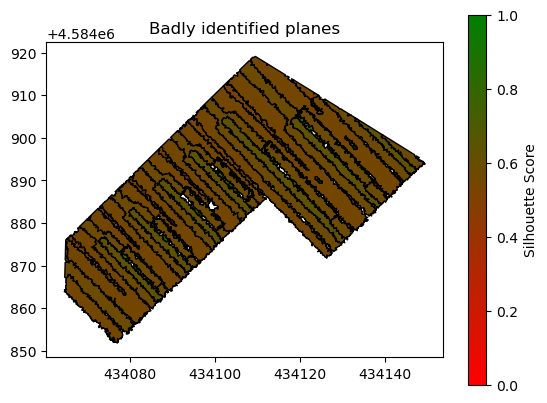

In [47]:
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

planeIDfile = parcelsFolder + parcel + "/" + construction + "/Plane Identification/" + construction + ".gpkg"


red_to_green = LinearSegmentedColormap.from_list("RedToGreen", ["red", "green"])

fig, ax = plt.subplots(1, 1)
planesGDF = gpd.read_file(planeIDfile)
plot = planesGDF.plot(column="silhouette", edgecolor="black", cmap=red_to_green, legend=False, ax=ax, vmin=0, vmax=1)

sm = plt.cm.ScalarMappable(cmap=red_to_green, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []  # Required for ScalarMappable
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Silhouette Score")

ax.set_aspect('equal', 'box')
# Show the plot
plt.title("Badly identified planes")
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Plane Identification/BadSilhouettePlanes.png", dpi=200)
plt.show()

In [23]:
planesGDF

cluster         A         B              D   tilt     azimuth  silhouette  \
0        3  0.000525 -0.001414    6267.491388  0.086  339.609312    0.632105   
1        1 -0.002696  0.003604  -15339.911648  0.258  143.199484    0.550025   
2        6 -0.002306  0.002437  -10156.520736  0.192  136.576583    0.784021   
3        4 -0.004890  0.005858  -24720.604463  0.437  140.146805    0.575725   
4        2  0.001489 -0.001605    6727.359617  0.125  317.159530    0.577156   
5        5  0.009796 -0.008566   35033.280388  0.746  311.166152    0.527838   
6        9  0.002550  0.005292  -25357.881718  0.337  205.730477    0.682637   
7        7  0.084187  0.078963 -398571.510660  6.584  226.833979    0.766012   

                                            geometry  
0  MULTIPOLYGON (((434080.216 4584868.026, 434080...  
1  MULTIPOLYGON (((434069.072 4584859.8, 434069.0...  
2  MULTIPOLYGON (((434084.979 4584865.471, 434084...  
3  MULTIPOLYGON (((434084.144 4584866.936, 434084...  
4  MULTIPOLYGON (((434068.425 4584864.58, 434068....  
5  MULTIPOLYGON (((434077.643 4584864.017, 434077...  
6  MULTIPOLYGON (((434123.957 4584890.288, 434123...  
7  MULTIPOLYGON (((434132.304 4584898.002, 434132...

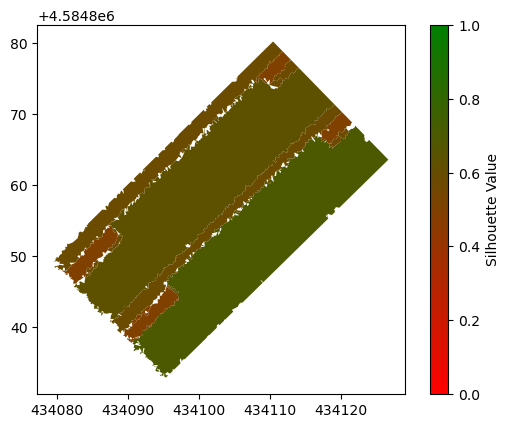

In [30]:
planeIDfile = parcelsFolder + parcel + "/" + "305" + "/Plane Identification/" + "305" + ".gpkg"

red_to_green = LinearSegmentedColormap.from_list("RedToGreen", ["red", "green"])

fig, ax = plt.subplots(1, 1)
planesGDF = gpd.read_file(planeIDfile)
plot = planesGDF.plot(column="silhouette", cmap=red_to_green, legend=False, ax=ax, vmin=0, vmax=1)

sm = plt.cm.ScalarMappable(cmap=red_to_green, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []  # Required for ScalarMappable
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Silhouette Value")

ax.set_aspect('equal', 'box')
# Show the plot
plt.show()

<Axes: >

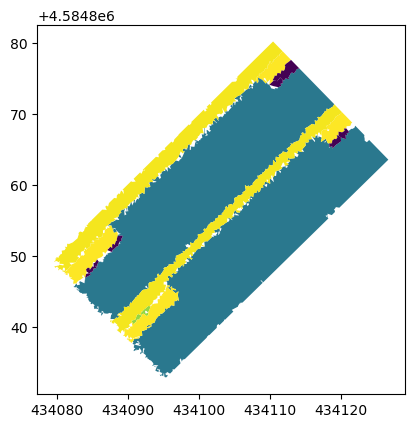

In [40]:
planesGDF.plot(column="azimuth")

In [33]:
planesGDF

cluster         A         B              D    tilt     azimuth  silhouette  \
0       10  0.094568 -0.016435   34319.969419   5.483  279.859072    0.493365   
1        1 -0.206830  0.211670 -880671.488866  16.486  135.662640    0.695680   
2        4  0.010996 -0.022029   96247.113992   1.410  333.474612    0.498206   
3        2 -0.198177  0.202493 -842353.545552  15.819  135.617183    0.635954   
4        3  0.009680 -0.015250   65736.585297   1.035  327.594505    0.582148   
5        5 -0.000693 -0.015756   72560.472075   0.904    2.519547    0.575196   

                                            geometry  
0  MULTIPOLYGON (((434091.102 4584840.726, 434091...  
1  MULTIPOLYGON (((434093.559 4584834.702, 434093...  
2  MULTIPOLYGON (((434082.338 4584846.6, 434082.3...  
3  MULTIPOLYGON (((434085.63 4584842.891, 434085....  
4  MULTIPOLYGON (((434080.843 4584848.393, 434080...  
5  MULTIPOLYGON (((434084.5 4584847.62, 434084.5 ...

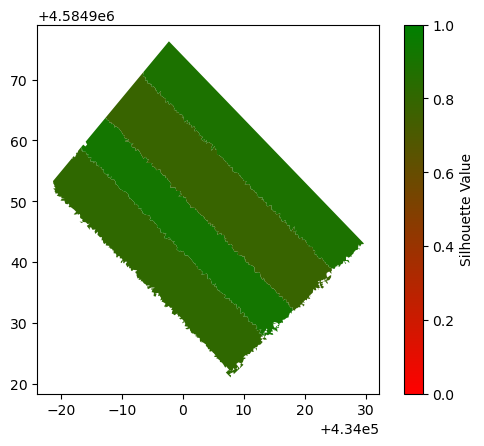

In [27]:

planeIDfile = basePath + "/Results/Test_70_el Besòs i el Maresme/Parcels/4151314DF3845A/672/Plane Identification/672.gpkg"

red_to_green = LinearSegmentedColormap.from_list("RedToGreen", ["red", "green"])

fig, ax = plt.subplots(1, 1)
planesGDF = gpd.read_file(planeIDfile)
plot = planesGDF.plot(column="silhouette", cmap=red_to_green, legend=False, ax=ax, vmin=0, vmax=1)

sm = plt.cm.ScalarMappable(cmap=red_to_green, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []  # Required for ScalarMappable
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Silhouette Value")

ax.set_aspect('equal', 'box')
# Show the plot
plt.show()

In [28]:
planesGDF

cluster         A         B             D    tilt     azimuth  silhouette  \
0        5 -0.088003 -0.085343  4.294967e+05   6.989   45.879068    0.824983   
1        2  0.242757  0.237505 -1.194289e+06  18.758  225.626562    0.813842   
2        4 -0.255344 -0.247064  1.243605e+06  19.560   45.944218    0.921865   
3        1  0.227346  0.225374 -1.131985e+06  17.751  225.249613    0.778544   
4        3 -0.249208 -0.241750  1.216585e+06  19.147   45.870307    0.888561   

                                            geometry  
0  POLYGON ((434007.559 4584922.32, 434007.559 45...  
1  POLYGON ((433982.499 4584948.287, 433982.499 4...  
2  POLYGON ((433986.881 4584954.958, 433986.881 4...  
3  POLYGON ((433992.258 4584958.59, 433992.258 45...  
4  POLYGON ((433997.004 4584966.95, 433997.005 45...

In [25]:
planesGDF

cluster         A         B              D    tilt     azimuth  silhouette  \
0       10  0.094568 -0.016435   34319.969419   5.483  279.859072    0.493365   
1        1 -0.206830  0.211670 -880671.488866  16.486  135.662640    0.695680   
2        4  0.010996 -0.022029   96247.113992   1.410  333.474612    0.498206   
3        2 -0.198177  0.202493 -842353.545552  15.819  135.617183    0.635954   
4        3  0.009680 -0.015250   65736.585297   1.035  327.594505    0.582148   
5        5 -0.000693 -0.015756   72560.472075   0.904    2.519547    0.575196   

                                            geometry  
0  MULTIPOLYGON (((434091.102 4584840.726, 434091...  
1  MULTIPOLYGON (((434093.559 4584834.702, 434093...  
2  MULTIPOLYGON (((434082.338 4584846.6, 434082.3...  
3  MULTIPOLYGON (((434085.63 4584842.891, 434085....  
4  MULTIPOLYGON (((434080.843 4584848.393, 434080...  
5  MULTIPOLYGON (((434084.5 4584847.62, 434084.5 ...

In [18]:
planesGDF

cluster         A         B              D   tilt     azimuth  silhouette  \
0        3  0.000525 -0.001414    6267.491388  0.086  339.609312    0.632105   
1        1 -0.002696  0.003604  -15339.911648  0.258  143.199484    0.550025   
2        6 -0.002306  0.002437  -10156.520736  0.192  136.576583    0.784021   
3        4 -0.004890  0.005858  -24720.604463  0.437  140.146805    0.575725   
4        2  0.001489 -0.001605    6727.359617  0.125  317.159530    0.577156   
5        5  0.009796 -0.008566   35033.280388  0.746  311.166152    0.527838   
6        9  0.002550  0.005292  -25357.881718  0.337  205.730477    0.682637   
7        7  0.084187  0.078963 -398571.510660  6.584  226.833979    0.766012   

                                            geometry  
0  MULTIPOLYGON (((434080.216 4584868.026, 434080...  
1  MULTIPOLYGON (((434069.072 4584859.8, 434069.0...  
2  MULTIPOLYGON (((434084.979 4584865.471, 434084...  
3  MULTIPOLYGON (((434084.144 4584866.936, 434084...  
4  MULTIPOLYGON (((434068.425 4584864.58, 434068....  
5  MULTIPOLYGON (((434077.643 4584864.017, 434077...  
6  MULTIPOLYGON (((434123.957 4584890.288, 434123...  
7  MULTIPOLYGON (((434132.304 4584898.002, 434132...

# Deprecated, get each histogram

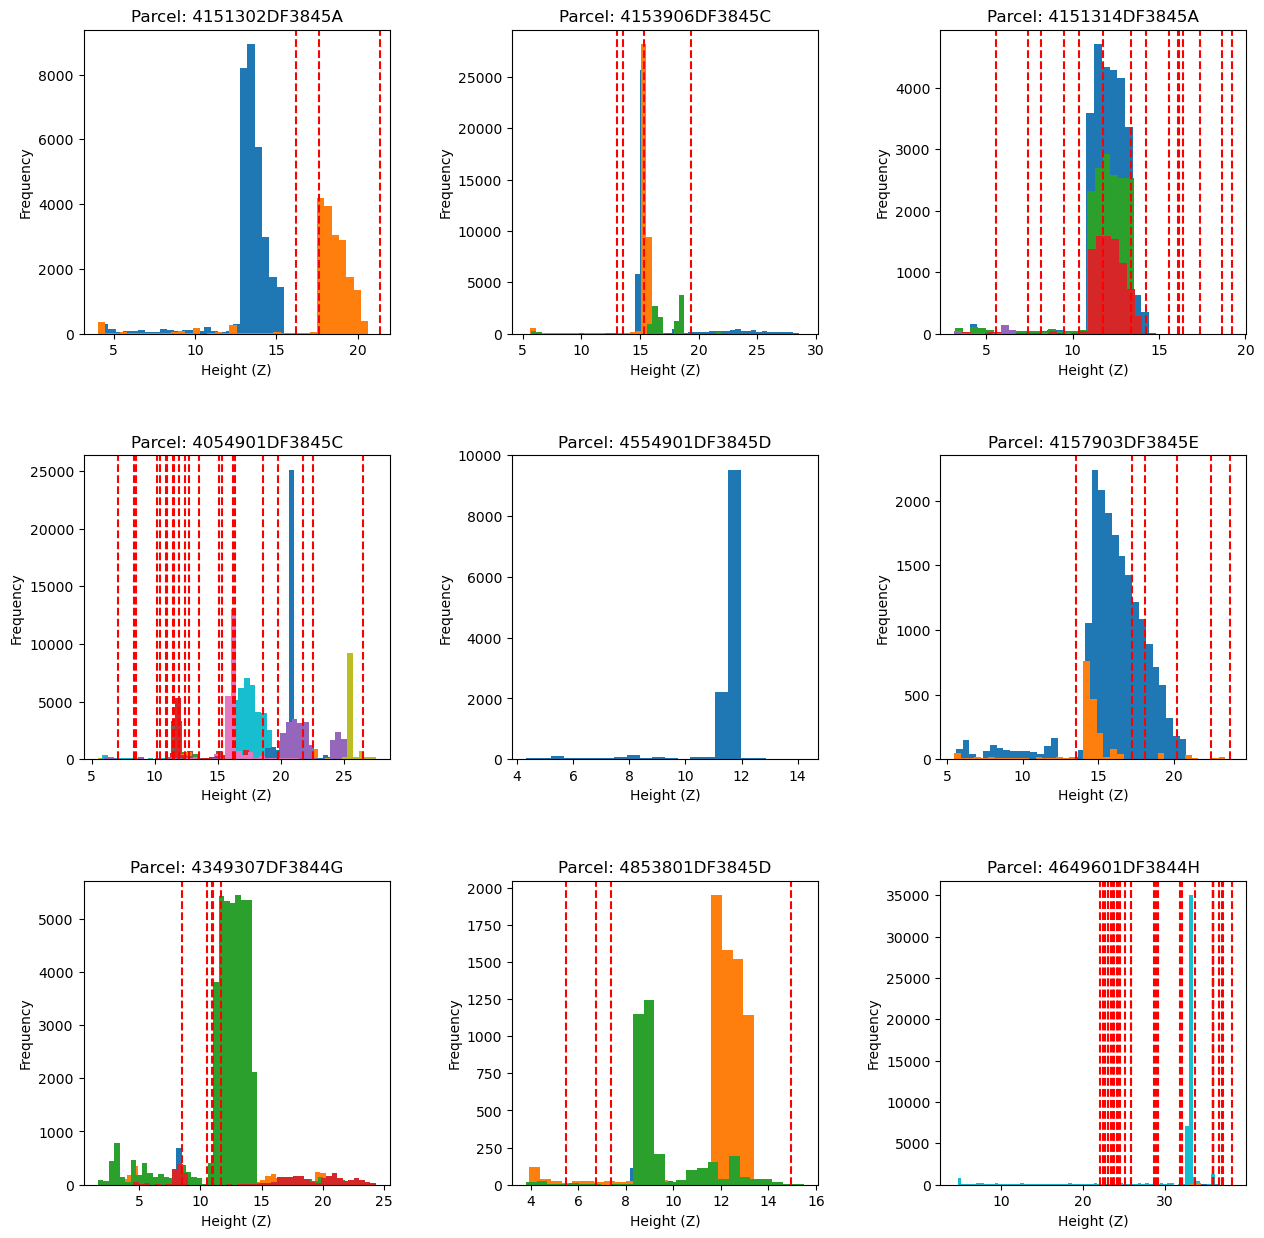

In [20]:
basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"
neighborhood = "Test_70_el Besòs i el Maresme"
parcelsFolder = basePath + "/Results/" + neighborhood + "/Parcels/"

distance_threshold = 0.45

parcels = [parcel for parcel in os.listdir(parcelsFolder) if os.path.isdir(parcelsFolder + parcel)]
num_parcels = len(parcels)

grid_size = 3
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for idx, parcel in enumerate(parcels):
    row, col = divmod(idx, grid_size)  # Determine grid position
    ax = axes[row, col]  # Get the current subplot
    ax.set_title(f"Parcel: {parcel}")

    parcelSubfolder = parcelsFolder + parcel + "/"

    constructions = [x for x in os.listdir(parcelSubfolder) if os.path.isdir(parcelSubfolder + x)]
    num_constructions = len(constructions)

    nested_fig, nested_axes = plt.subplots(num_constructions, 1, sharex=True, figsize=(5, num_constructions * 2))
    nested_axes = np.atleast_1d(nested_axes)

    for construction in [x for x in os.listdir(parcelSubfolder) if os.path.isdir(parcelSubfolder + x)]:
        constructionFolder = parcelSubfolder + construction
        lasPath = constructionFolder + "/Map files/" + construction + ".laz"
        lasDF = laspy.read(lasPath)
        Z = np.array(lasDF.z)
        Z = Z[Z.argsort()]         
        deltaZ = np.diff(Z, prepend=0)
        
        heightSplits = []
        for i in range(1, len(deltaZ)):
            if deltaZ[i] > distance_threshold:
                heightSplits.append(Z[i])

        bins = np.arange(np.min(Z), np.max(Z), distance_threshold)
        ax.hist(Z, bins)
        for split in heightSplits:
            ax.axvline(x=split, color='red', linestyle='--', linewidth=1.5)
    
    ax.set_xlabel("Height (Z)")
    ax.set_ylabel("Frequency")

plt.show()

In [12]:
np.array(Z)

array([6.148, 5.098, 4.77 , ..., 4.707, 4.798, 5.634])